<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/neuro/NeuroIA/deep_learning_ok.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>
    <div align="center"> Recordá abrir en una nueva pestaña </div>
    

# Deep Learning I

En esta colab continuamos con el dataset de OkCupid y usamos *computer vision* para explorar características de la imagen, como:

- posa con un auto?
- aparece con otras personas?
- usa anteojos de sol?

Para esto sencillamente cargamos el modelo pre-entrenado Yolov5 y obtenemos los labels de las predicciones.

## Cargamos los datos

In [ ]:
import pandas as pd
import torch
import matplotlib.pyplot as plt 
%matplotlib notebook

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter

In [ ]:
# disculpen pero esta vez no podemos compartir los datos. 
# Pero sí los labels! Y pueden probar el modelo cargando imagenes que quieran también :)

In [ ]:
df = pd.read_csv('photos.csv', index_col=0) 
df.head()

,id,width,height,caption,square225,original,__typename,user_id
0,2475679684877490794,1126.0,1500.0,NaN,https://cdn.okccdn.com/php/load_okc_image.php/...,https://cdn.okccdn.com/php/load_okc_image.php/...,Photo,15133918527483950122
1,5771215445652092653,1125.0,1500.0,NaN,https://cdn.okccdn.com/php/load_okc_image.php/...,https://cdn.okccdn.com/php/load_okc_image.php/...,Photo,15133918527483950122
2,8577906958050887268,1456.0,1500.0,NaN,https://cdn.okccdn.com/php/load_okc_image.php/...,https://cdn.okccdn.com/php/load_okc_image.php/...,Photo,15133918527483950122
3,8993298214177846352,844.0,1500.0,2019,https://cdn.okccdn.com/php/load_okc_image.php/...,https://cdn.okccdn.com/php/load_okc_image.php/...,Photo,15133918527483950122
4,16985502672862890272,1125.0,1500.0,2019,https://cdn.okccdn.com/php/load_okc_image.php/...,https://cdn.okccdn.com/php/load_okc_image.php/...,Photo,15133918527483950122


In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or yolov5m, yolov5x, custom

In [ ]:
img = 'https://ultralytics.com/images/zidane.jpg'  # or file, PIL, OpenCV, numpy, multiple
results = model(img)
labels = results.pandas().xyxy[0]['name'].values

In [ ]:
labels

array(['person', 'tie', 'person', 'tie'], dtype=object)

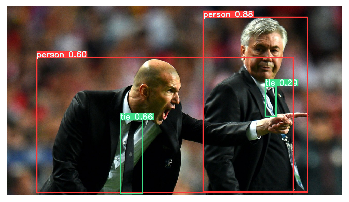

In [ ]:
#plt.figure(figsize = (12,12))
plt.imshow(results.render()[0], interpolation='nearest')
plt.axis('off')
plt.show()

In [ ]:
def object_predict(url):
  try:
    results = model(url)
    labels = results.pandas().xyxy[0]['name'].values.tolist()
  except Exception as e:
    # file not found
    return []
  return labels

In [ ]:
%%time 
# 5 min x 1000 imgs
df_sm = df.sample(10000)
labels = []

for url in tqdm(df_sm['original'].values.tolist()):
  p = object_predict(url)
  labels.append(p)

# labels = [list(a) for a in labels]

In [ ]:
[i for i,l in enumerate(labels) if 'orange' in l]

[1084, 1120, 1343, 1456, 1628, 2174, 3117, 4764]

In [ ]:
labels_dicts = [dict(Counter(l)) for l in labels]

joined = [f'{q} {obj}' for d in labels_dicts for obj, q in d.items()]

freq = pd.Series(joined).value_counts(normalize=True)

In [ ]:
fig = px.line(x=freq.index, y=freq.values)
fig.update_xaxes(tickangle=50, tickfont=dict(family='Rockwell', color='crimson', size=13))

In [ ]:
from google.colab import files
files.download('img_labels.csv')

# Pseudocódigo integrador

```python
# python
from sklearn.familia_modelos import ModeloMachineLearning
import pandas as pd

def preparar(dato):
    dato_limpio = limpiar_dato(dato)
    dato_completo = imputar_nulos(dato)
    dato_nuevo = calcular_nuevo_dato(dato_completo)
    return dato_nuevo

datos = []
for dato in datos_crudos:
    dato_limpio = preparar(dato)
    datos.append(dato_limpio)

df = pd.read_csv('mi_archivo.csv') # o con pandas
df = df.apply(preparar)

X = df[columnas_variables]
y = df[columna_objetivo]


X_train, X_test, y_train, y_test = train_test_split(X,y)

modelo = ModeloMachineLearning(parametros) # sklearn 
modelo.fit(X_train, y_train) 
predicciones = modelo.predict(X_test)

resultados = calcular_metricas(y_test, predicciones)
graficar(resultados) # matplotlib, plotly
```

## Red Neuronal en MNIST

In [ ]:
# Import libraries
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Create test and training sets
train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))


# This section will shuffle our input/training data so that we have a randomized shuffle of our data and do not risk feeding data with a pattern. Anorther objective here is to send the data in batches. This is a good step to practice in order to make sure the neural network does not overfit our data. NN’s are too prone to overfitting just because of the exorbitant amount of data that is required. For each batch size, the neural network will run a back propagation for new updated weights to try and decrease loss each time.
trainset = torch.utils.data.DataLoader(train, batch_size=100, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=100, shuffle=False)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 64)
        self.fc5 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        x = self.fc5(x)
        return F.log_softmax(x, dim=1)

net = Net()
net

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
import matplotlib.pyplot as plt 
from IPython.display import clear_output

loss_function = nn.CrossEntropyLoss() # MSE

optimizer = optim.SGD(net.parameters(), lr=0.001)

for epoch in range(5):
  for data in trainset:  # 'data' es un "batch" de casos
      X, y = data  # X es batch de features, y de targets.
      net.zero_grad()  # reseteamos el gradiente antes de calcular la perdida
      output = net(X.view(-1, 28*28))  # aplanamos la imagen en un solo vector
      loss = loss_function(output, y)  # calculamos el error
      loss.backward()  # aplicamos la pérdida con backpropagation a través de los parámetros
      optimizer.step()  # optimizamos los pesos usando por ejemplo SGD (o Adam)

4


In [ ]:
# Calculamos accuracy
correct = 0
total = 0

for data in testset:
    X, y = data
    output = net(X.view(-1,784))
    for idx, i in enumerate(output):
        if torch.argmax(i) == y[idx]:
            correct += 1
        total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.926


## Huggingface Pipeline

In [ ]:
!pip install -q transformers

In [ ]:
from transformers import pipeline

In [ ]:
nlp = pipeline(
    'question-answering', 
    model='mrm8488/distill-bert-base-spanish-wwm-cased-finetuned-spa-squad2-es', # se pueden encontrar en https://huggingface.co/models
    tokenizer='mrm8488/distill-bert-base-spanish-wwm-cased-finetuned-spa-squad2-es'
)

In [ ]:
context = """Johannes Brahms (Hamburgo, 7 de mayo de 1833-Viena, 3 de abril de 1897) fue un compositor, pianista y director de orquesta alemán del romanticismo, considerado el más clásico de los compositores de dicho periodo. Nacido en Hamburgo en una familia luterana, pasó gran parte de su vida profesional en Viena. Se mantuvo fiel toda su vida al clasicismo romántico y conservador, influenciado por Wolfgang Amadeus Mozart, Joseph Haydn y, particularmente, por Ludwig van Beethoven y Robert Schumann. Fue posiblemente el mayor representante del círculo conservador en la Guerra de los románticos. Sus oponentes, los progresistas radicales de Weimar, estaban representados por Franz Liszt, los integrantes de la posteriormente llamada Nueva Escuela Alemana y por Richard Wagner. Los escritores contemporáneos y posteriores lo han considerado como tradicionalista e innovador. Su música está firmemente arraigada en las estructuras y técnicas de composición de los maestros clásicos. Si bien muchos contemporáneos encontraron su música demasiado académica, su contribución y artesanía han sido admiradas por figuras posteriores tan diversas como Arnold Schönberg y Edward Elgar. La naturaleza diligente y altamente construida de sus obras fue un punto de partida y una inspiración para una generación de compositores. Sin embargo, incrustados dentro de sus meticulosas estructuras, hay motivos profundamente románticos."""

In [ ]:
nlp(
    {
        'question': '¿De dónde es Brahms?',
        'context': context
                    
    }
)

{'answer': 'Hamburgo', 'end': 25, 'score': 0.6839092373847961, 'start': 17}

In [ ]:
nlp(
    {
        'question': '¿Cuál es el nombre de Brahms? ',
        'context': context
    }
)

{'answer': 'Johannes Brahms',
 'end': 15,
 'score': 0.7549846768379211,
 'start': 0}

In [ ]:
nlp(
    {
        'question': '¿Cuál fue su fecha de nacimiento?',
        'context': context
                    
    }
)

{'answer': '7 de mayo de 1833',
 'end': 44,
 'score': 0.7629082798957825,
 'start': 27}

Links:

- https://huggingface.co/transformers/main_classes/pipelines.html

- https://github.com/institutohumai/recursos-ia/
- https://github.com/institutohumai/cursos-python

Colabs de demo:

https://github.com/christianmerkwirth/colabs